In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [6]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [15]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [8]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
label_name = train.columns[-1]
label_name

'Outcome'

In [10]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y_train = train[label_name]
print(y_train.shape)
y_train.head() #vector

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [14]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_predict = model.predict(X_test) # prediction
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [22]:
X_test[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


[Text(191.93015060240964, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(65.39692771084337, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.907951807228915, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.453975903614458, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.226987951807229, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.680963855421687, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.453975903614458, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.907951807228915, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(19.361927710843375, 172.6729411764706, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(16.134939

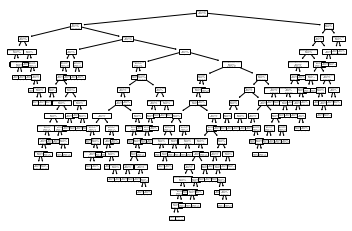

In [23]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

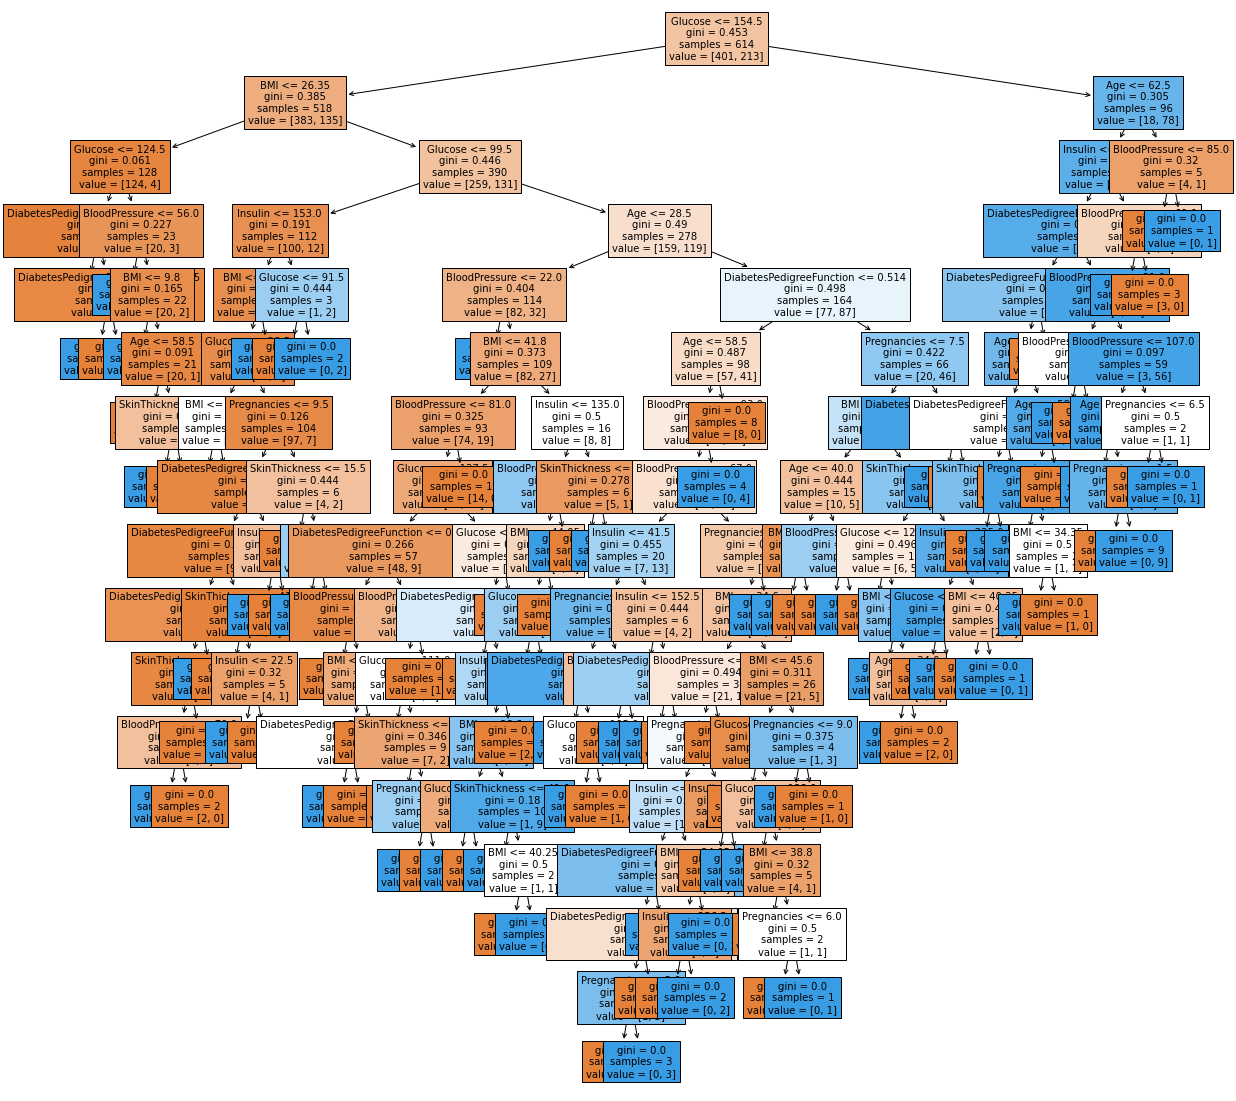

In [25]:
from sklearn.tree import plot_tree

#### Tree Visulization
plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True, 
                           fontsize=10)

In [36]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names, filled=True)


In [38]:
model.feature_importances_

array([0.07214157, 0.31686869, 0.11895343, 0.04162882, 0.08104912,
       0.17437398, 0.11208469, 0.08289971])

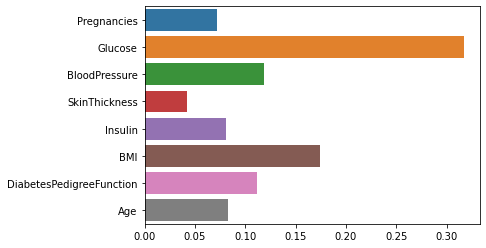

In [39]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [40]:
diff_count = abs(y_test - y_predict).sum()
diff_count

44

In [41]:
abs(y_test - y_predict).sum() / len(y_test)

0.2857142857142857

In [42]:
(len(y_test) - diff_count) / len(y_test) * 100 # 71% accuracy

71.42857142857143

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)


0.7142857142857143

In [46]:
model.score(X_test, y_test) * 100

71.42857142857143